
... ***CURRENTLY UNDER DEVELOPMENT*** ...


In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from datetime import datetime

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.rbf import RBF_Interpolation
from teslakit.mda import Normalize



## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/albacid/Projects/TeslaKit_projects'
db = Database(p_data)

# set site
db.SetSite('KWAJALEIN')


# --------------------------------------
# Load offshore regular waves (CSIRO)

WVS = xr.open_dataset(op.join(p_data, 'sites/KWAJALEIN/WAVES/waves_historical.nc'))  # hourly
print(WVS)    
print()


# --------------------------------------
# Load offshore TC waves (data every 20')

WAVES_TCs = xr.open_dataset(op.join(p_data, 'inputs_Kwajalein/TCs/historical_TCs/all_historical_TCs/output_nonstat_nest_pts.nc')) 

WAVES_TCs = WAVES_TCs.squeeze(dim='point', drop=True)
print(WAVES_TCs)    


#---------------------------------
# Selected TCs

TCs={0: ('Alice', datetime(1978,12,31), datetime(1979,1,7)), 
     1: ('Pamela', datetime(1982,11,23), datetime(1982,11,28)),
     2: ('Gay', datetime(1992,11,14), datetime(1992,11,21)), 
     3: ('Paka', datetime(1997,12,8), datetime(1997,12,14))}



<xarray.Dataset>
Dimensions:      (time: 363048)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 ... 2020-05-31T23:00:00
Data variables:
    Hs           (time) float32 ...
    Tp           (time) float32 ...
    Dir          (time) float32 ...
    sea_Hs       (time) float32 ...
    sea_Tp       (time) float32 ...
    sea_Dir      (time) float32 ...
    swell_1_Hs   (time) float64 ...
    swell_1_Tp   (time) float64 ...
    swell_1_Dir  (time) float64 ...
    swell_2_Hs   (time) float64 ...
    swell_2_Tp   (time) float64 ...
    swell_2_Dir  (time) float64 ...
    TC_category  (time) float64 ...
Attributes:
    source:   teslakit_v0.9.1

<xarray.Dataset>
Dimensions:  (case: 64, time: 12683)
Coordinates:
  * time     (time) datetime64[ns] 1951-03-18T18:40:00 ... 2015-07-05T20:40:00
  * case     (case) int64 0 1 2 3 4 5 6 7 8 9 ... 54 55 56 57 58 59 60 61 62 63
Data variables:
    DEP      (case, time) float64 ...
    HS       (case, time) float64 ...
    HSWELL   (case,

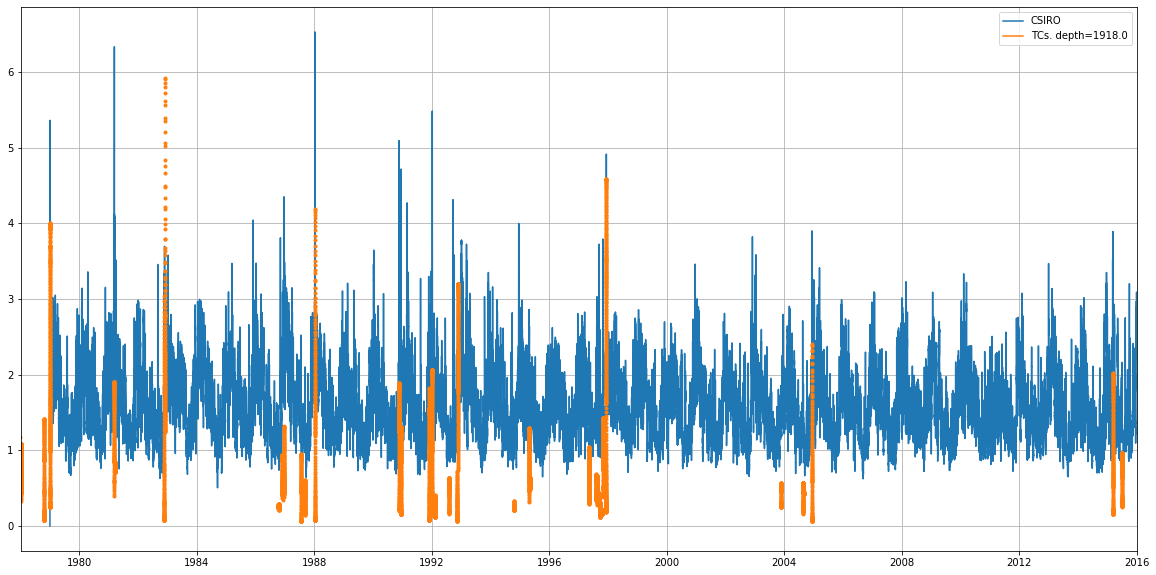

In [3]:

plt.figure(figsize=(20,10))
plt.plot(WVS.time, WVS.Hs, label='CSIRO')

for c in WAVES_TCs.case.values:

    plt.plot(WAVES_TCs.time, WAVES_TCs.HS.isel(case=c), '.',color='#ff7f0e')

plt.plot(WAVES_TCs.time, WAVES_TCs.HS.isel(case=0), color='#ff7f0e', label = ('TCs. depth=' + str(WAVES_TCs.DEP.isel(case=0).values[0])))
plt.xlim(datetime(1978,1,1), datetime(2016,1,1))
#plt.xlim(datetime(1982,10,1), datetime(1983,1,1)) # TC Alice
plt.legend()
plt.grid()
